# Paired sampled t-test

In [1]:


from pandas import DataFrame
import statsmodels.api as sm
import pandas as pd
from scipy import stats

import numpy as np

from statsmodels.stats import weightstats as stests

df = pd.read_excel("paired_scores.xlsx")
print(df)


   Student  Before  After
0        1      68     75
1        2      72     78
2        3      65     70
3        4      74     80
4        5      70     77
5        6      69     73
6        7      71     79
7        8      67     72
8        9      73     81
9       10      66     74


In [ ]:

df[['bp_before','bp_after']].describe()
df.head()


,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


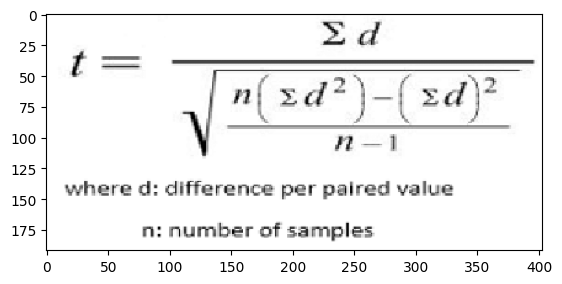

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  # Read Images
img = mpimg.imread('pairedt.png')

# Output Images
plt.imshow(img)

In [2]:
from scipy.stats import ttest_rel

# Select before & after columns from your file
before = df["Before"]
after = df["After"]

# Paired t-test
t_stat, p_value = ttest_rel(before, after)

print("Paired Samples t-Test Result")
print("-----------------------------")
print(f"t-Statistic: {t_stat:.4f}")
print(f"p-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis → There is a significant difference.")
else:
    print("\nConclusion: Fail to reject the null hypothesis → No significant difference.")


Paired Samples t-Test Result
-----------------------------
t-Statistic: -14.1544
p-Value: 0.0000

Conclusion: Reject the null hypothesis → There is a significant difference.


### Interpretation

A paired samples t-test was conducted to determine whether the training program improved student performance. The analysis revealed a statistically significant improvement (t(9) = −14.15, p < 0.001). Therefore, we reject the null hypothesis and conclude that the training had a significant positive effect.


# ANOVA

One way ANOVA

Example : there are 3 different category of plant and
their weight. And need to check whether all 3 group are
similar or not

In [4]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

df_anova = pd.read_excel('anova_scores.xlsx')

print(df_anova)

   Student Group  Score
0        1     A     78
1        2     A     82
2        3     A     75
3        4     B     85
4        5     B     88
5        6     B     90
6        7     C     70
7        8     C     72
8        9     C     68


In [5]:
# Select only required columns
df_anova = df_anova[['Score', 'Group']]

# Get unique group names
grps = pd.unique(df_anova.Group.values)

print(df_anova)
print("\nGroups:", grps)


   Score Group
0     78     A
1     82     A
2     75     A
3     85     B
4     88     B
5     90     B
6     70     C
7     72     C
8     68     C

Groups: ['A' 'B' 'C']


In [6]:
# Create separate lists of scores for each group
d_data = {grp: df_anova['Score'][df_anova.Group == grp] for grp in grps}

# Perform one-way ANOVA
F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'])

print("ANOVA F-value:", round(F,4))
print("P-value:", p)


ANOVA F-value: 31.0147
P-value: 0.0006860623774384232


In [7]:
print("P-value:", p)

alpha = 0.05
if p < alpha:
    print("Conclusion: Reject the null hypothesis → There is a significant difference between group means.")
else:
    print("Conclusion: Fail to reject the null hypothesis → No significant difference between group means.")


P-value: 0.0006860623774384232
Conclusion: Reject the null hypothesis → There is a significant difference between group means.


# Two way ANOVA
Grand mean crop yield (the mean crop yield
not by any sub-group), as well the mean crop yield by
each factor, as well as by the factors grouped together.

In [8]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

df_anova2 = pd.read_excel("two_way_anova.xlsx")

print(df_anova2)


    Student Group Treatment  Score
0         1     A         X     78
1         2     A         X     82
2         3     A         X     75
3         4     A         Y     85
4         5     A         Y     88
5         6     A         Y     90
6         7     B         X     70
7         8     B         X     72
8         9     B         X     68
9        10     B         Y     80
10       11     B         Y     83
11       12     B         Y     85


In [9]:
model = ols('Score ~ C(Group)*C(Treatment)', df_anova2).fit()
print(f"Overall model F({model.df_model:.0f},{model.df_resid:.0f}) = {model.fvalue:.3f}, p = {model.f_pvalue:.4f}")
res = sm.stats.anova_lm(model, typ=2)
res


Overall model F(3,8) = 23.203, p = 0.0003


,sum_sq,df,F,PR(>F)
C(Group),133.333333,1.0,18.390805,0.002657
C(Treatment),363.000000,1.0,50.068966,0.000104
C(Group):C(Treatment),8.333333,1.0,1.149425,0.314943
Residual,58.000000,8.0,NaN,NaN


In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     23.20
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           0.000266
Time:                        20:19:42   Log-Likelihood:                -26.480
No. Observations:                  12   AIC:                             60.96
Df Residuals:                       8   BIC:                             62.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          78.3333      1.555     50.389      0.000      74.749      81.918
C(Group)[T.B]                      -8.3333      2.198     -3.790      0.005     -13.403      -3.264
C(Treatment)[T.Y]                   9.3333      2.198      4.245      0.003       4.264      14.403
C(Group)[T.B]:C(Treatment)[T.Y]     3.3333      3.109      1.072      0.315      -3.836      10.503
==============================================================================
Omnibus:                        1.374   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.754
Skew:                          -0.002   Prob(JB):                        0.686
Kurtosis:                       1.772   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# chi-square test
We could use a chi-square test for independence to
determine whether gender is related to voting
preference

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


In [12]:


df_chi = pd.read_excel('chi_square.xlsx')

df_chi.head()

,Person,Gender,Preference
0,1,Male,Coffee
1,2,Male,Tea
2,3,Male,Coffee
3,4,Female,Tea
4,5,Female,Coffee


In [15]:
print(df_chi.columns.tolist())


['Person', 'Gender', 'Preference']


In [16]:
contingency_table = pd.crosstab(df_chi["Gender"], df_chi["Preference"])
print("\nContingency Table:\n", contingency_table)



Contingency Table:
 Preference  Coffee  Tea
Gender                 
Female           2    3
Male             3    2


In [17]:
#Observed Values
Observed_Values = contingency_table.values
print("Observed Values :-\n",Observed_Values)


Observed Values :-
 [[2 3]
 [3 2]]


In [18]:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)


Expected Values :-
 [[2.5 2.5]
 [2.5 2.5]]


In [19]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

alpha = 0.05

Degree of Freedom:- 1


In [22]:

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
#print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
# print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)

p-value: 0.5270892568655381


In [23]:

print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.4
critical_value: 3.841458820694124
p-value: 0.5270892568655381
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
